Loading MNIST dataset...
Training Random Forest model...

=== Model Evaluation ===
Accuracy: 0.9891428571428571
AUC: 0.9991204810970559

Classification Report:
               precision    recall  f1-score   support

       False       0.99      1.00      0.99     12727
        True       1.00      0.88      0.94      1273

    accuracy                           0.99     14000
   macro avg       0.99      0.94      0.97     14000
weighted avg       0.99      0.99      0.99     14000



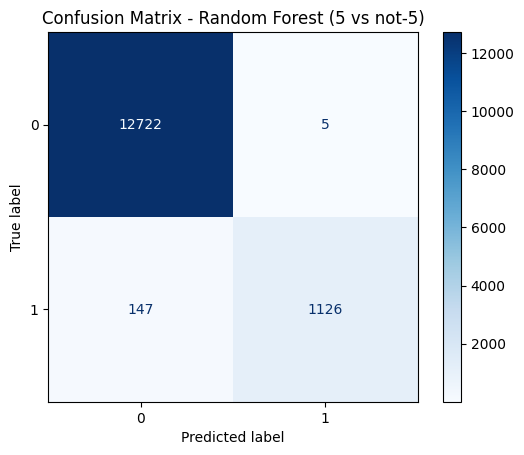

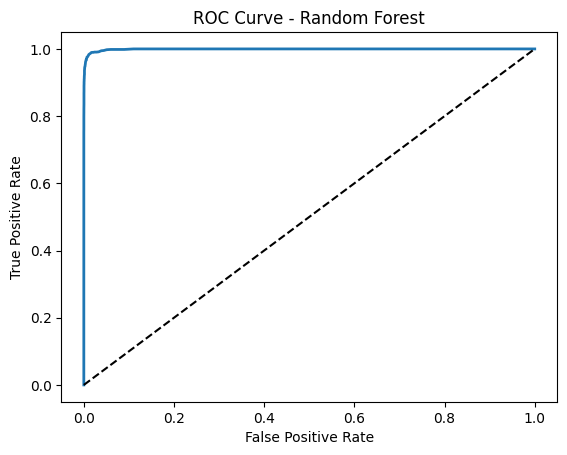

In [3]:
# --- Import Libraries ---
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, confusion_matrix, ConfusionMatrixDisplay,
    classification_report, roc_auc_score, roc_curve
)

# --- Load MNIST Dataset ---
print("Loading MNIST dataset...")
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist["data"], mnist["target"].astype(np.int8)

# --- Create Binary Target ---
# We'll classify '5' vs 'not 5'
y_binary = (y == 5)

# --- Train/Test Split ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y_binary, test_size=0.2, random_state=42
)

# --- Initialize and Train Random Forest ---
print("Training Random Forest model...")
rf_clf = RandomForestClassifier(
    n_estimators=100,  # number of trees
    max_depth=None,    # let the trees grow fully
    n_jobs=-1,         # use all CPU cores
    random_state=42
)
rf_clf.fit(X_train, y_train)

# --- Predictions ---
y_pred = rf_clf.predict(X_test)
y_prob = rf_clf.predict_proba(X_test)[:, 1]

# --- Evaluation Metrics ---
print("\n=== Model Evaluation ===")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_prob))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# --- Confusion Matrix ---
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot(cmap="Blues")
plt.title("Confusion Matrix - Random Forest (5 vs not-5)")
plt.show()

# --- ROC Curve ---
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.show()
